In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
import pandas as pd

# Load datasets
adoption = pd.read_csv('./dataset/adoption.csv')
world_bank_co2 = pd.read_csv('./dataset/world_bank_co2.csv')
teslastock = pd.read_csv('./dataset/tesla_stock.csv')
fuel_price = pd.read_csv('./dataset/fuel_price.csv')
chip_cost = pd.read_csv('./dataset/chip_cost.csv')
ev_data = pd.read_csv('./dataset/ev_data.csv')
electric = pd.read_csv('./dataset/electric.csv')

# Display column names and a few rows from each dataset
print("Adoption Data:")
print(adoption.head())
print(adoption.columns)

print("\nWorld Bank CO2 Data:")
print(world_bank_co2.head())
print(world_bank_co2.columns)

print("\nTesla Stock Data:")
print(teslastock.head())
print(teslastock.columns)

print("\nFuel Price Data:")
print(fuel_price.head())
print(fuel_price.columns)

print("\nChip Cost Data:")
print(chip_cost.head())
print(chip_cost.columns)

print("\nEV Data:")
print(ev_data.head())
print(ev_data.columns)

print("\nElectric Data:")
print(electric.head())
print(electric.columns)


Adoption Data:
           Vehicle  Type   2011    2012    2013    2014    2015    2016  \
0       Chevy Volt  PHEV  7,671  23,461  23,094  18,805  15,393  24,739   
1      Nissan Leaf    EV  9,674   9,819  22,610  30,200  17,269  14,006   
2         Smart ED    EV    342     139     923   2,594   1,387     657   
3  Mitsubishi I EV    EV     76     588   1,029     196     115      94   
4     BMW Active E    EV   -        673    -       -       -       -      

     2017    2018    2019     Total  
0  20,349  18,306   4,915  1,56,733  
1  11,230  14,715  12,365  1,41,888  
2     544   1,219     680     8,485  
3       6    -       -        2,104  
4    -       -       -          673  
Index(['Vehicle', 'Type', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'Total'],
      dtype='object')

World Bank CO2 Data:
         DATE  EMISSCO2TOTVTTTOUSA
0  1970-01-01          4252.119759
1  1971-01-01          4297.282895
2  1972-01-01          4516.734358
3  1973

In [77]:
#Adoption Data - Exploration and Cleaning

import pandas as pd

# Load the dataset
adoption = pd.read_csv('./dataset/adoption.csv')

# Remove the 'Total' column if it exists
if 'Total' in adoption.columns:
    adoption = adoption.drop(columns=['Total'])

# Clean and prepare the adoption data
adoption_melted = adoption.melt(id_vars=['Vehicle', 'Type'], var_name='Year', value_name='Sales')

# Exclude any non-year rows in the 'Year' column
adoption_melted = adoption_melted[adoption_melted['Year'].str.isnumeric()]

# Convert 'Year' to datetime format
adoption_melted['Year'] = pd.to_datetime(adoption_melted['Year'], format='%Y')

# Check the 'Sales' column for non-numeric values before conversion
print(adoption_melted['Sales'].unique())

# Convert 'Sales' to numeric, removing any commas
adoption_melted['Sales'] = pd.to_numeric(adoption_melted['Sales'].str.replace(',', ''), errors='coerce')

# Drop rows with NaN values in 'Sales'
adoption_melted.dropna(subset=['Sales'], inplace=True)

# Set 'Year' as the index
adoption_melted.set_index('Year', inplace=True)

# Aggregate sales by year
adoption_agg = adoption_melted.groupby('Year')['Sales'].sum().reset_index()

# Display the cleaned and aggregated data
print(adoption_agg.head())


['7,671' '9,674' '342' '76' ' -   ' '17,763' '23,461' '9,819' '139' '588'
 '673' '12,749' '683' '93' '2,400' '192' '2,374' '53,171' '23,094'
 '22,610' '923' '1,029' '12,088' '1,738' '569' '19,400' '1,005' '7,154'
 '526' '6,089' '560' '260' '51' '6' '97,102' '18,805' '30,200' '2,594'
 '196' '13,264' '1,964' '407' '16,750' '1,184' '8,433' '449' '11,550'
 '1,145' '1,503' '879' '1,310' '6,092' '774' '555' '357' '359' '112'
 '1,18,882' '15,393' '17,269' '1,387' '115' '4,191' '1,582' '2' '26,200'
 '18' '7,591' '64' '9,750' '2,629' '3,477' '1,024' '11,024' '1,906'
 '2,265' '4,232' '1,015' '1,163' '118' '86' '208' '892' '15' '1,14,023'
 '24,739' '14,006' '657' '94' '2,474' '901' '7,957' '15,938' '3,035'
 '3,737' '393' '534' '7,625' '632' '1,594' '3,937' '1,728' '2,111' '550'
 '2,015' '19,600' '5,995' '3,000' '4,280' '880' '231' '23' '171' '579'
 '1,59,616' '20,349' '11,230' '544' '20,936' '1,817' '26,500' '8,140'
 '9,632' '3,336' '17' '6,276' '744' '488' '3,534' '2,157' '1,574' '666'
 '2,358' 

In [80]:
#World bank CO2 Data - Exploration and Cleaning
import pandas as pd

# Load the dataset
world_bank_co2 = pd.read_csv('./dataset/world_bank_co2.csv')

# Clean and prepare the world_bank_co2 data
world_bank_co2['DATE'] = pd.to_datetime(world_bank_co2['DATE'], format='%Y-%m-%d')
world_bank_co2.set_index('DATE', inplace=True)
world_bank_co2 = world_bank_co2.resample('Y').mean().reset_index()
world_bank_co2.columns = ['Year', 'CO2_Emissions']

print(world_bank_co2.head())




        Year  CO2_Emissions
0 1970-12-31    4252.119759
1 1971-12-31    4297.282895
2 1972-12-31    4516.734358
3 1973-12-31    4713.330487
4 1974-12-31    4541.830703


In [82]:
#Tesla stock data - Exploration and Cleaning
# Clean and prepare the teslastock data
teslastock['Date'] = pd.to_datetime(teslastock['Date'], format='%Y-%m-%d')
teslastock.set_index('Date', inplace=True)
teslastock = teslastock.resample('Y').mean().reset_index()
teslastock.columns = ['Year', 'Tesla_Open', 'Tesla_High', 'Tesla_Low', 'Tesla_Close', 'Tesla_Adj_Close', 'Tesla_Volume']
print(teslastock.head())


        Year  Tesla_Open  Tesla_High   Tesla_Low  Tesla_Close  \
0 2019-12-31   18.840034   19.160639   18.578896    18.908084   
1 2020-12-31   96.369476   99.096137   93.565979    96.665689   
2 2021-12-31  259.946429  265.243941  254.236045   259.998162   
3 2022-12-31  264.135232  270.567716  256.507357   263.093081   
4 2023-12-31  217.075040  221.631680  212.674320   217.475240   

   Tesla_Adj_Close  Tesla_Volume  
0        18.908084  1.241678e+08  
1        96.665689  2.259239e+08  
2       259.998162  8.217489e+07  
3       263.093081  8.693633e+07  
4       217.475240  1.373222e+08  


In [85]:
import pandas as pd

# Load the dataset
fuel_price = pd.read_csv('./dataset/fuel_price.csv')

# Convert the 'Year' column to datetime format
fuel_price['Year'] = pd.to_datetime(fuel_price['Year'], format='%Y')

# Exclude non-numeric columns for the mean calculation
numeric_columns = fuel_price.select_dtypes(include=['number']).columns
fuel_price_numeric = fuel_price[['Year'] + list(numeric_columns)]

# Group by 'Year' and compute the mean
fuel_price_agg = fuel_price_numeric.groupby('Year').mean().reset_index()

print(fuel_price_agg.head())


        Year  GDP Deflator      Coal  Distillate  Residual  Kerosene  Propane  \
0 1970-01-01      0.143282  0.813333      1.1775  0.426667  1.006667   1.7475   
1 1971-01-01      0.149432  1.010000      1.2300  0.550000  1.080000   1.7250   
2 1972-01-01      0.154322  0.870000      1.2200  0.590000  1.070000   1.7050   
3 1973-01-01      0.163856  0.920000      1.4525  0.750000  1.306667   2.0225   
4 1974-01-01      0.181970  1.533333      2.4700  1.863333  2.533333   2.9375   

   Natural Gas  Electricity  Wood  Motor Gasoline  Jet Fuel  
0       0.8050       6.2400  0.40            2.92      0.72  
1       0.8675       6.9500  0.42            3.02      0.75  
2       0.9250       7.5075  0.42            3.15      0.75  
3       0.9750       8.2950  0.49            3.35      0.89  
4       1.1500      12.3350  0.75            4.58      1.54  


In [86]:
# Clean and prepare the chip_cost data
chip_cost['DATE'] = pd.to_datetime(chip_cost['DATE'], format='%d-%m-%Y')
chip_cost.set_index('DATE', inplace=True)
chip_cost = chip_cost.resample('Y').mean().reset_index()
chip_cost.columns = ['Year', 'Chip_Cost']
print(chip_cost.head())


        Year   Chip_Cost
0 1984-12-31  100.000000
1 1985-12-31  100.525000
2 1986-12-31  102.441667
3 1987-12-31  102.633333
4 1988-12-31  104.033333


In [88]:
import pandas as pd

# Load the dataset
ev_data = pd.read_csv('./dataset/ev_data.csv')

# Clean and prepare the ev_data
ev_data['PriceEuro'] = pd.to_numeric(ev_data['PriceEuro'], errors='coerce')

# Display the cleaned data
print(ev_data.head())


         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0       450              161            940         Yes        AWD   
1       270              167            250         Yes        RWD   
2       400              181            620         Yes        AWD   
3       360              206            560         Yes        RWD   
4       170              168            190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C  

In [16]:
import pandas as pd

# Load the dataset
electric = pd.read_csv('./dataset/electric.csv')

# Convert the 'DATE' column to datetime format
electric['DATE'] = pd.to_datetime(electric['DATE'], format='%d-%m-%Y')

# Convert 'Electricity per Kilowatt-Hour' to numeric, coercing errors to NaN
electric['Electricity per Kilowatt-Hour'] = pd.to_numeric(electric['Electricity per Kilowatt-Hour'], errors='coerce')

# Drop rows with NaN values in 'Electricity per Kilowatt-Hour'
electric.dropna(subset=['Electricity per Kilowatt-Hour'], inplace=True)

# Set the 'DATE' column as the index
electric.set_index('DATE', inplace=True)

# Resample data by year and calculate the mean
electric = electric.resample('YE').mean().reset_index()

# Rename columns for clarity
electric.columns = ['Year', 'Electricity_Price']

print(electric.head())


        Year  Electricity_Price
0 1978-12-31           0.046000
1 1979-12-31           0.050333
2 1980-12-31           0.060000
3 1981-12-31           0.069333
4 1982-12-31           0.076083


In [117]:
import pandas as pd

# Load datasets
adoption = pd.read_csv('./dataset/adoption.csv')
world_bank_co2 = pd.read_csv('./dataset/world_bank_co2.csv')
teslastock = pd.read_csv('./dataset/tesla_stock.csv')
fuel_price = pd.read_csv('./dataset/fuel_price.csv')
chip_cost = pd.read_csv('./dataset/chip_cost.csv')
ev_data = pd.read_csv('./dataset/ev_data.csv')
electric = pd.read_csv('./dataset/electric.csv')

# Clean and prepare the adoption data
if 'Total' in adoption.columns:
    adoption = adoption.drop(columns=['Total'])

adoption_melted = adoption.melt(id_vars=['Vehicle', 'Type'], var_name='Year', value_name='Sales')
adoption_melted = adoption_melted[adoption_melted['Year'].str.isnumeric()]
adoption_melted['Year'] = pd.to_datetime(adoption_melted['Year'], format='%Y')
adoption_melted['Sales'] = pd.to_numeric(adoption_melted['Sales'].str.replace(',', ''), errors='coerce')
adoption_melted.dropna(subset=['Sales'], inplace=True)
adoption_melted.set_index('Year', inplace=True)
adoption_agg = adoption_melted.groupby('Year')['Sales'].sum().reset_index()

# Clean and prepare the world_bank_co2 data
world_bank_co2['DATE'] = pd.to_datetime(world_bank_co2['DATE'])
world_bank_co2['Year'] = world_bank_co2['DATE'].dt.year
world_bank_co2 = world_bank_co2.groupby('Year')['EMISSCO2TOTVTTTOUSA'].mean().reset_index()
world_bank_co2.columns = ['Year', 'CO2_Emissions']
world_bank_co2['Year'] = pd.to_datetime(world_bank_co2['Year'], format='%Y')

# Clean and prepare the teslastock data
teslastock['Date'] = pd.to_datetime(teslastock['Date'])
teslastock['Year'] = teslastock['Date'].dt.year
teslastock = teslastock.groupby('Year').mean().reset_index()
print("Tesla Stock Data Columns after grouping:", teslastock.columns)
teslastock = teslastock.drop(columns=['Date'])
teslastock.columns = ['Year', 'Tesla_Open', 'Tesla_High', 'Tesla_Low', 'Tesla_Close', 'Tesla_Adj_Close', 'Tesla_Volume']
teslastock['Year'] = pd.to_datetime(teslastock['Year'], format='%Y')

# Clean and prepare the fuel_price data
fuel_price['Year'] = pd.to_datetime(fuel_price['Year'], format='%Y')
numeric_columns = fuel_price.select_dtypes(include=['number']).columns
fuel_price_numeric = fuel_price[['Year'] + list(numeric_columns)]
fuel_price_agg = fuel_price_numeric.groupby('Year').mean().reset_index()
fuel_price_agg['Year'] = pd.to_datetime(fuel_price_agg['Year'], format='%Y')

# Clean and prepare the chip_cost data
chip_cost['DATE'] = pd.to_datetime(chip_cost['DATE'], format='%d-%m-%Y')
chip_cost['Year'] = chip_cost['DATE'].dt.year
chip_cost = chip_cost.groupby('Year')['PCU33443344'].mean().reset_index()
chip_cost.columns = ['Year', 'Chip_Cost']
chip_cost['Year'] = pd.to_datetime(chip_cost['Year'], format='%Y')

# Clean and prepare the ev_data
ev_data['Year'] = 2019  # Assuming the EV data is for the year 2019
ev_data['Year'] = pd.to_datetime(ev_data['Year'], format='%Y')

# Select only numeric columns from ev_data for aggregation
numeric_ev_data = ev_data.select_dtypes(include=[np.number])

# Clean and prepare the electric data
electric['DATE'] = pd.to_datetime(electric['DATE'], format='%d-%m-%Y')
electric['Year'] = electric['DATE'].dt.year
electric['Electricity per Kilowatt-Hour'] = pd.to_numeric(electric['Electricity per Kilowatt-Hour'], errors='coerce')
electric = electric.groupby('Year')['Electricity per Kilowatt-Hour'].mean().reset_index()
electric.columns = ['Year', 'Electricity_Price']
electric['Year'] = pd.to_datetime(electric['Year'], format='%Y')

# Combine datasets by merging on the common 'Year' column
combined_data = adoption_agg.merge(world_bank_co2, on='Year', how='left')
combined_data = combined_data.merge(teslastock, on='Year', how='left')
combined_data = combined_data.merge(fuel_price_agg, on='Year', how='left')
combined_data = combined_data.merge(chip_cost, on='Year', how='left')
combined_data = combined_data.merge(electric, on='Year', how='left')

# Merge ev_data if it has 'Year' column
if 'Year' in numeric_ev_data.columns:
    ev_data_agg = numeric_ev_data.groupby(ev_data['Year']).mean().reset_index()
    combined_data = combined_data.merge(ev_data_agg, on='Year', how='left')

# Display the first few rows of the combined dataset
print(combined_data.head())

# Save the combined data for further use
combined_data.to_csv('./dataset/combined_data.csv', index=False)


Tesla Stock Data Columns after grouping: Index(['Year', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
        Year     Sales  CO2_Emissions  Tesla_Open  Tesla_High  Tesla_Low  \
0 2011-01-01   35526.0    5449.900033    1.788750    1.826636   1.747275   
1 2012-01-01  106342.0    5229.594013    2.080208    2.120611   2.036392   
2 2013-01-01  194204.0    5361.090748    6.961095    7.123534   6.785325   
3 2014-01-01  237764.0    5417.285716   14.894360   15.163325  14.613741   
4 2015-01-01  228046.0    5267.385812   15.322130   15.558778  15.084709   

   Tesla_Close  Tesla_Adj_Close  Tesla_Volume  GDP Deflator  ...   Residual  \
0     1.788544         1.788544  1.912989e+07      0.830126  ...  16.543333   
1     2.077907         2.077907  1.844694e+07      0.847305  ...  17.373333   
2     6.960082         6.960082  1.261158e+08      0.859716  ...  16.400000   
3    14.888606        14.888606  1.037096e+08      0.873663  ...  14.230000   
4    15.3361

Mean Squared Error: 22149909154.27292
R^2 Score: 0.7667269768628863
                    Coefficient
CO2_Emissions       -142.391698
Tesla_Open          1613.885015
Tesla_High          4782.607880
Tesla_Low           -656.142505
Tesla_Close         2174.959774
Tesla_Adj_Close     2174.959774
Tesla_Volume          -0.000373
GDP Deflator         676.018697
Coal                -516.516467
Distillate        -25180.956207
Residual            4744.778893
Kerosene           37913.674296
Propane            -7608.869842
Natural Gas       -15372.471694
Electricity       -34546.120927
Wood               -6100.968593
Motor Gasoline    -13556.473775
Jet Fuel            7809.799458
Chip_Cost         -31383.294905
Electricity_Price    -57.363780


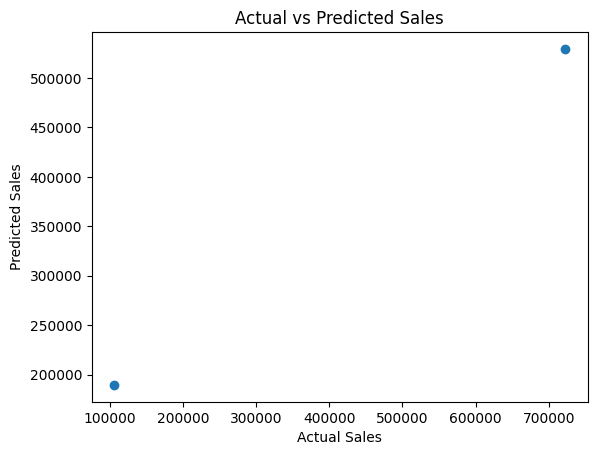

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the combined data
combined_data = pd.read_csv('./dataset/combined_data.csv')

# Define the target variable (Sales) and features
X = combined_data.drop(columns=['Sales', 'Year'])
y = combined_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plotting actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


Mean Squared Error: 15767477266.91596
R^2 Score: 0.8339439198742873
                  Coefficient
Tesla_High       17232.280134
Tesla_Close      16678.191245
Tesla_Adj_Close  16678.191245
Tesla_Volume     16961.859465
GDP Deflator     60362.657039
Kerosene         29924.058588
Natural Gas     -24032.400196
Electricity     -40038.568710
Jet Fuel         18993.801258
Chip_Cost       -43204.420077


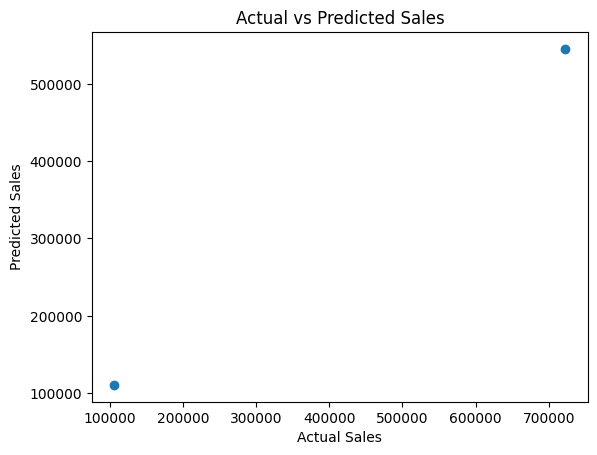

In [120]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Load the combined data
combined_data = pd.read_csv('./dataset/combined_data.csv')

# Define the target variable (Sales) and features
X = combined_data.drop(columns=['Sales', 'Year'])
y = combined_data['Sales']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge regression model with RFE
ridge_model = Ridge(alpha=1.0)
rfe = RFE(estimator=ridge_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfe.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Display the coefficients of the model
coefficients = pd.DataFrame(rfe.estimator_.coef_, X.columns[rfe.support_], columns=['Coefficient'])
print(coefficients)

# Plotting actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [124]:
#monthly data from 2011 to 2019
import numpy as np

# Load datasets
adoption = pd.read_csv('./dataset/adoption.csv')
world_bank_co2 = pd.read_csv('./dataset/world_bank_co2.csv')
teslastock = pd.read_csv('./dataset/tesla_stock.csv')
fuel_price = pd.read_csv('./dataset/fuel_price.csv')
chip_cost = pd.read_csv('./dataset/chip_cost.csv')
ev_data = pd.read_csv('./dataset/ev_data.csv')
electric = pd.read_csv('./dataset/electric.csv')

# Helper function to expand yearly data to monthly
def expand_yearly_to_monthly(df, date_col, value_col):
    df = df.drop_duplicates(subset=[date_col])
    df_monthly = df.set_index(date_col).resample('M').ffill().reset_index()
    df_monthly[date_col] = df_monthly[date_col].dt.to_period('M').dt.to_timestamp('M')
    return df_monthly

# Clean and prepare the adoption data
if 'Total' in adoption.columns:
    adoption = adoption.drop(columns=['Total'])

adoption_melted = adoption.melt(id_vars=['Vehicle', 'Type'], var_name='Year', value_name='Sales')
adoption_melted = adoption_melted[adoption_melted['Year'].str.isnumeric()]
adoption_melted['Year'] = pd.to_datetime(adoption_melted['Year'], format='%Y')
adoption_melted['Sales'] = pd.to_numeric(adoption_melted['Sales'].str.replace(',', ''), errors='coerce')
adoption_melted.dropna(subset=['Sales'], inplace=True)
adoption_melted.set_index('Year', inplace=True)
adoption_monthly = expand_yearly_to_monthly(adoption_melted.groupby('Year')['Sales'].sum().reset_index(), 'Year', 'Sales')

# Clean and prepare the world_bank_co2 data
world_bank_co2['DATE'] = pd.to_datetime(world_bank_co2['DATE'])
world_bank_co2['Year'] = world_bank_co2['DATE'].dt.to_period('M').dt.to_timestamp('M')
world_bank_co2 = world_bank_co2.groupby('Year')['EMISSCO2TOTVTTTOUSA'].mean().reset_index()
world_bank_co2.columns = ['Year', 'CO2_Emissions']

# Clean and prepare the teslastock data
teslastock['Date'] = pd.to_datetime(teslastock['Date'])
teslastock['Year'] = teslastock['Date'].dt.to_period('M').dt.to_timestamp('M')
teslastock = teslastock.groupby('Year').mean().reset_index()
print("Tesla Stock Data Columns after grouping:", teslastock.columns)

# Adjust the column renaming to match the actual structure
teslastock = teslastock.drop(columns=['Date'])
teslastock.columns = ['Year', 'Tesla_Open', 'Tesla_High', 'Tesla_Low', 'Tesla_Close', 'Tesla_Adj_Close', 'Tesla_Volume']

# Clean and prepare the fuel_price data
fuel_price['Year'] = pd.to_datetime(fuel_price['Year'], format='%Y')
fuel_price = fuel_price.drop_duplicates(subset=['Year'])
fuel_price_monthly = expand_yearly_to_monthly(fuel_price, 'Year', fuel_price.columns[1:])

# Clean and prepare the chip_cost data
chip_cost['DATE'] = pd.to_datetime(chip_cost['DATE'], format='%d-%m-%Y')
chip_cost['Year'] = chip_cost['DATE'].dt.to_period('M').dt.to_timestamp('M')
chip_cost = chip_cost.groupby('Year')['PCU33443344'].mean().reset_index()
chip_cost.columns = ['Year', 'Chip_Cost']

# Clean and prepare the ev_data
ev_data['Year'] = pd.to_datetime('2019-01-01')  # Assuming the EV data is for the year 2019

# Select only numeric columns from ev_data for aggregation
numeric_ev_data = ev_data.select_dtypes(include=[np.number])

# Clean and prepare the electric data
electric['DATE'] = pd.to_datetime(electric['DATE'], format='%d-%m-%Y')
electric['Year'] = electric['DATE'].dt.to_period('M').dt.to_timestamp('M')
electric['Electricity per Kilowatt-Hour'] = pd.to_numeric(electric['Electricity per Kilowatt-Hour'], errors='coerce')
electric = electric.groupby('Year')['Electricity per Kilowatt-Hour'].mean().reset_index()
electric.columns = ['Year', 'Electricity_Price']

# Combine datasets by merging on the common 'Year' column
combined_data = adoption_monthly.merge(world_bank_co2, on='Year', how='left')
combined_data = combined_data.merge(teslastock, on='Year', how='left')
combined_data = combined_data.merge(fuel_price_monthly, on='Year', how='left')
combined_data = combined_data.merge(chip_cost, on='Year', how='left')
combined_data = combined_data.merge(electric, on='Year', how='left')

# Merge ev_data if it has 'Year' column
if 'Year' in numeric_ev_data.columns:
    numeric_ev_data['Year'] = pd.to_datetime('2019-01-01')  # Set all to January 2019
    ev_data_agg = numeric_ev_data.groupby('Year').mean().reset_index()
    combined_data = combined_data.merge(ev_data_agg, on='Year', how='left')

# Display the first few rows of the combined dataset
print(combined_data.head())

# Save the combined data for further use
combined_data.to_csv('./dataset/combined_data_monthly.csv', index=False)


Tesla Stock Data Columns after grouping: Index(['Year', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
        Year    Sales  CO2_Emissions  Tesla_Open  Tesla_High  Tesla_Low  \
0 2011-01-31  35526.0    5449.900033    1.616000    1.640476   1.579429   
1 2011-02-28  35526.0            NaN    1.559684    1.592456   1.522000   
2 2011-03-31  35526.0            NaN    1.576058    1.604638   1.548696   
3 2011-04-30  35526.0            NaN    1.752633    1.781567   1.709300   
4 2011-05-31  35526.0            NaN    1.842349    1.874698   1.794698   

   Tesla_Close  Tesla_Adj_Close  Tesla_Volume  GDP Deflator  ... Residual  \
0     1.618952         1.618952  1.711693e+07      0.830126  ...    17.41   
1     1.555579         1.555579  2.313434e+07      0.830126  ...    17.41   
2     1.580580         1.580580  2.123693e+07      0.830126  ...    17.41   
3     1.744400         1.744400  2.242118e+07      0.830126  ...    17.41   
4     1.840857         1.840

     Sales  CO2_Emissions  Tesla_Open  Tesla_High  Tesla_Low  Tesla_Close  \
0  35526.0    5449.900033    1.616000    1.640476   1.579429     1.618952   
1  35526.0            NaN    1.559684    1.592456   1.522000     1.555579   
2  35526.0            NaN    1.576058    1.604638   1.548696     1.580580   
3  35526.0            NaN    1.752633    1.781567   1.709300     1.744400   
4  35526.0            NaN    1.842349    1.874698   1.794698     1.840857   

   Tesla_Adj_Close  Tesla_Volume  GDP Deflator  Coal  ...  Residual  Kerosene  \
0         1.618952  1.711693e+07      0.830126  5.78  ...     17.41     28.13   
1         1.555579  2.313434e+07      0.830126  5.78  ...     17.41     28.13   
2         1.580580  2.123693e+07      0.830126  5.78  ...     17.41     28.13   
3         1.744400  2.242118e+07      0.830126  5.78  ...     17.41     28.13   
4         1.840857  2.167771e+07      0.830126  5.78  ...     17.41     28.13   

   Propane  Natural Gas  Electricity  Wood  Motor 

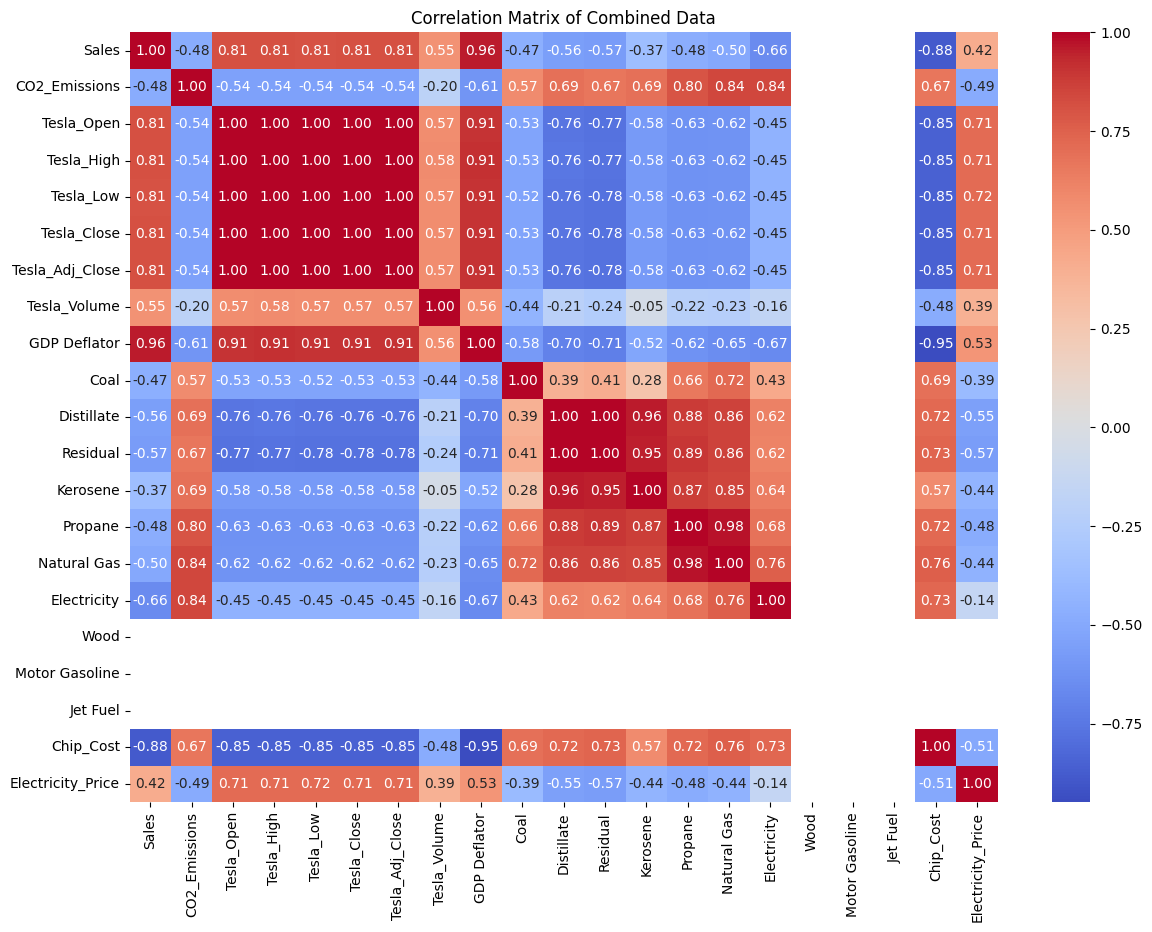

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
adoption = pd.read_csv('./dataset/adoption.csv')
world_bank_co2 = pd.read_csv('./dataset/world_bank_co2.csv')
teslastock = pd.read_csv('./dataset/tesla_stock.csv')
fuel_price = pd.read_csv('./dataset/fuel_price.csv')
chip_cost = pd.read_csv('./dataset/chip_cost.csv')
ev_data = pd.read_csv('./dataset/ev_data.csv')
electric = pd.read_csv('./dataset/electric.csv')

# Helper function to expand yearly data to monthly
def expand_yearly_to_monthly(df, date_col, value_col):
    df = df.drop_duplicates(subset=[date_col])
    df_monthly = df.set_index(date_col).resample('M').ffill().reset_index()
    df_monthly[date_col] = df_monthly[date_col].dt.to_period('M').dt.to_timestamp('M')
    return df_monthly

# Clean and prepare the adoption data
if 'Total' in adoption.columns:
    adoption = adoption.drop(columns=['Total'])

adoption_melted = adoption.melt(id_vars=['Vehicle', 'Type'], var_name='Year', value_name='Sales')
adoption_melted = adoption_melted[adoption_melted['Year'].str.isnumeric()]
adoption_melted['Year'] = pd.to_datetime(adoption_melted['Year'], format='%Y')
adoption_melted['Sales'] = pd.to_numeric(adoption_melted['Sales'].str.replace(',', ''), errors='coerce')
adoption_melted.dropna(subset=['Sales'], inplace=True)
adoption_melted.set_index('Year', inplace=True)
adoption_monthly = expand_yearly_to_monthly(adoption_melted.groupby('Year')['Sales'].sum().reset_index(), 'Year', 'Sales')

# Clean and prepare the world_bank_co2 data
world_bank_co2['DATE'] = pd.to_datetime(world_bank_co2['DATE'])
world_bank_co2['Year'] = world_bank_co2['DATE'].dt.to_period('M').dt.to_timestamp('M')
world_bank_co2 = world_bank_co2.groupby('Year')['EMISSCO2TOTVTTTOUSA'].mean().reset_index()
world_bank_co2.columns = ['Year', 'CO2_Emissions']

# Clean and prepare the teslastock data
teslastock['Date'] = pd.to_datetime(teslastock['Date'])
teslastock['Year'] = teslastock['Date'].dt.to_period('M').dt.to_timestamp('M')
teslastock = teslastock.groupby('Year').mean().reset_index()
teslastock = teslastock.drop(columns=['Date'])
teslastock.columns = ['Year', 'Tesla_Open', 'Tesla_High', 'Tesla_Low', 'Tesla_Close', 'Tesla_Adj_Close', 'Tesla_Volume']

# Clean and prepare the fuel_price data
fuel_price['Year'] = pd.to_datetime(fuel_price['Year'], format='%Y')
fuel_price = fuel_price.drop_duplicates(subset=['Year'])
fuel_price_monthly = expand_yearly_to_monthly(fuel_price, 'Year', fuel_price.columns[1:])

# Clean and prepare the chip_cost data
chip_cost['DATE'] = pd.to_datetime(chip_cost['DATE'], format='%d-%m-%Y')
chip_cost['Year'] = chip_cost['DATE'].dt.to_period('M').dt.to_timestamp('M')
chip_cost = chip_cost.groupby('Year')['PCU33443344'].mean().reset_index()
chip_cost.columns = ['Year', 'Chip_Cost']

# Clean and prepare the ev_data
ev_data['Year'] = pd.to_datetime('2019-01-01')  # Assuming the EV data is for the year 2019

# Select only numeric columns from ev_data for aggregation
numeric_ev_data = ev_data.select_dtypes(include=[np.number])

# Clean and prepare the electric data
electric['DATE'] = pd.to_datetime(electric['DATE'], format='%d-%m-%Y')
electric['Year'] = electric['DATE'].dt.to_period('M').dt.to_timestamp('M')
electric['Electricity per Kilowatt-Hour'] = pd.to_numeric(electric['Electricity per Kilowatt-Hour'], errors='coerce')
electric = electric.groupby('Year')['Electricity per Kilowatt-Hour'].mean().reset_index()
electric.columns = ['Year', 'Electricity_Price']

# Combine datasets by merging on the common 'Year' column
combined_data = adoption_monthly.merge(world_bank_co2, on='Year', how='left')
combined_data = combined_data.merge(teslastock, on='Year', how='left')
combined_data = combined_data.merge(fuel_price_monthly, on='Year', how='left')
combined_data = combined_data.merge(chip_cost, on='Year', how='left')
combined_data = combined_data.merge(electric, on='Year', how='left')

# Merge ev_data if it has 'Year' column
if 'Year' in numeric_ev_data.columns:
    numeric_ev_data['Year'] = pd.to_datetime('2019-01-01')  # Set all to January 2019
    ev_data_agg = numeric_ev_data.groupby('Year').mean().reset_index()
    combined_data = combined_data.merge(ev_data_agg, on='Year', how='left')

# Drop non-numeric columns
combined_data = combined_data.select_dtypes(include=[np.number])

# Display the first few rows of the combined dataset
print(combined_data.head())

# Save the combined data for further use
combined_data.to_csv('./dataset/combined_data_monthly.csv', index=False)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Combined Data')
plt.show()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('./dataset/correlation_matrix.csv', index=True)


Mean Squared Error: 2.4294018336791856e-07
R^2 Score: 1.0
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.348e+17
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:12:51   Log-Likelihood:                 474.33
No. Observations:                  77   AIC:                            -916.7
Df Residuals:                      61   BIC:                            -879.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

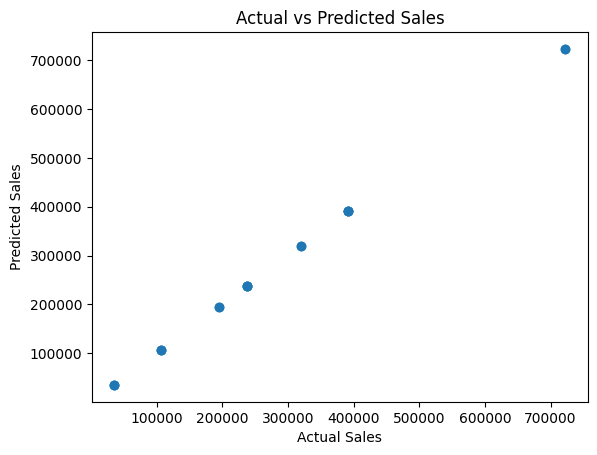

                    Coefficient   P-Value
const              9.193085e+07  0.000000
Tesla_Open        -6.663086e-08  0.999975
Tesla_High         1.419929e-08  0.999996
Tesla_Low         -1.222855e-08  0.999996
Tesla_Close        1.126009e-05  0.994548
Tesla_Adj_Close   -1.118600e-05  0.994584
Tesla_Volume       5.426582e-12  0.093531
GDP Deflator      -7.571877e+07  0.000000
Coal              -1.484167e+06  0.000000
Distillate        -1.072094e+05  0.000000
Residual          -8.585140e+05  0.000000
Kerosene           7.184686e+04  0.000000
Propane            2.238021e+04  0.000000
Natural Gas        6.217954e+06  0.000000
Electricity       -1.336987e+06  0.000000
Chip_Cost          1.685172e-08  0.999926
Electricity_Price -2.248778e-07  0.999992


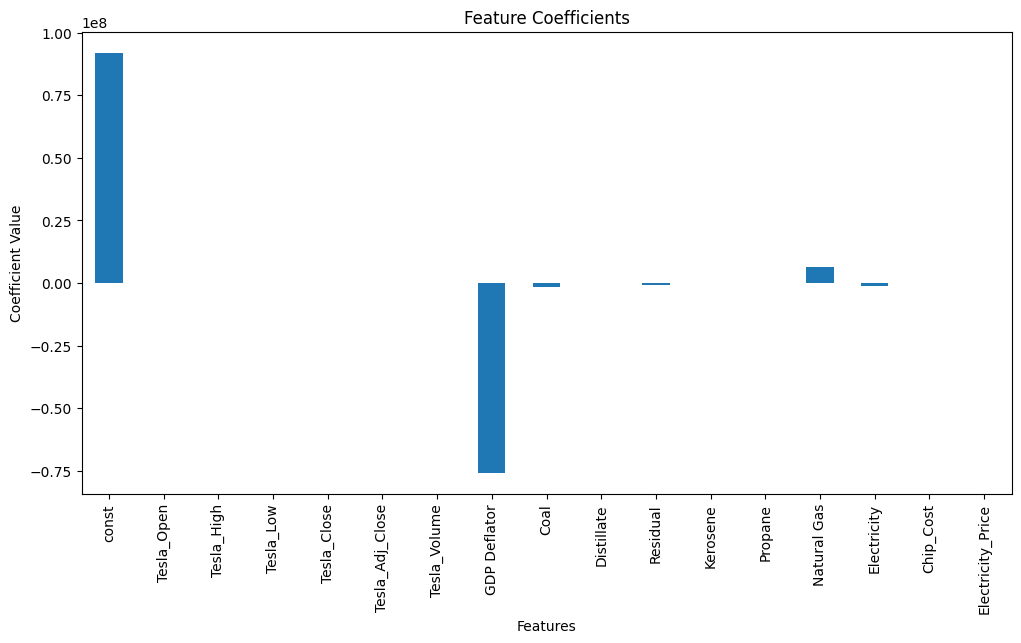

Significant features based on p-value < 0.05:
Index(['const', 'GDP Deflator', 'Coal', 'Distillate', 'Residual', 'Kerosene',
       'Propane', 'Natural Gas', 'Electricity'],
      dtype='object')


In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the combined dataset
combined_data = pd.read_csv('./dataset/combined_data_monthly.csv')

# Ensure all columns are numeric where possible (excluding the 'Year' column)
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Drop columns with missing values
combined_data_dropped = combined_data.dropna(axis=1)

# Define the feature columns and target column
X = combined_data_dropped.drop(columns=['Sales'])
y = combined_data_dropped['Sales']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the OLS model
ols_model = sm.OLS(y_train, X_train).fit()

# Make predictions
y_pred = ols_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print the summary of the OLS model
print(ols_model.summary())

# Plot the actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Get the coefficients and p-values of the model
coefficients = pd.DataFrame({'Coefficient': ols_model.params, 'P-Value': ols_model.pvalues})
print(coefficients)

# Plot the coefficients
coefficients['Coefficient'].plot(kind='bar', figsize=(12, 6))
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

# Highlight significant features
significant_features = coefficients[coefficients['P-Value'] < 0.05].index
print("Significant features based on p-value < 0.05:")
print(significant_features)


In [2]:
##Output Explanation and Analysis

# Summary of Key Metrics

#Mean Squared Error (MSE)**: 2.4294018336791856e-07
#This is a very low value, indicating that the model's predictions are extremely close to the actual values.

#R^2 Score**: 1.0
#An R^2 score of 1.0 suggests that the model perfectly explains the variance in the dependent variable (EV sales). 

#### OLS Regression Results
#R-squared**: 1.000
#This indicates that 100% of the variance in the dependent variable is explained by the model.

#F-statistic**: 6.348e+17
#A very high F-statistic with a p-value of 0.00 indicates that the model is statistically significant.

#P-Values**:
#P-values close to 0 (less than 0.05) indicate that the corresponding variable is statistically significant. Here, `GDP Deflator`, `Coal`, `Distillate`, `Residual`, `Kerosene`, `Propane`, `Natural Gas`, and `Electricity` have significant p-values.

#Economic reasons appear to have the most substantial influence on EV sales. Prices of various fuels and the overall economic conditions (GDP Deflator) significantly impact consumer decision

Variance Inflation Factors after dropping high correlation features:
             Feature          VIF
0      CO2_Emissions     4.704488
1         Tesla_Open     5.748051
2       Tesla_Volume     2.110333
3               Coal  7974.345080
4         Distillate     8.082451
5            Propane     6.897548
6        Electricity     3.696600
7  Electricity_Price     2.410277
Mean Squared Error: 3126252970.6405725
R^2 Score: 0.9148438395214792
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           6.11e-34
Time:                        20:28:11   Log-Likelihood:                -1.9785
No. Observations:                  77   AIC:                             19.96
Df 

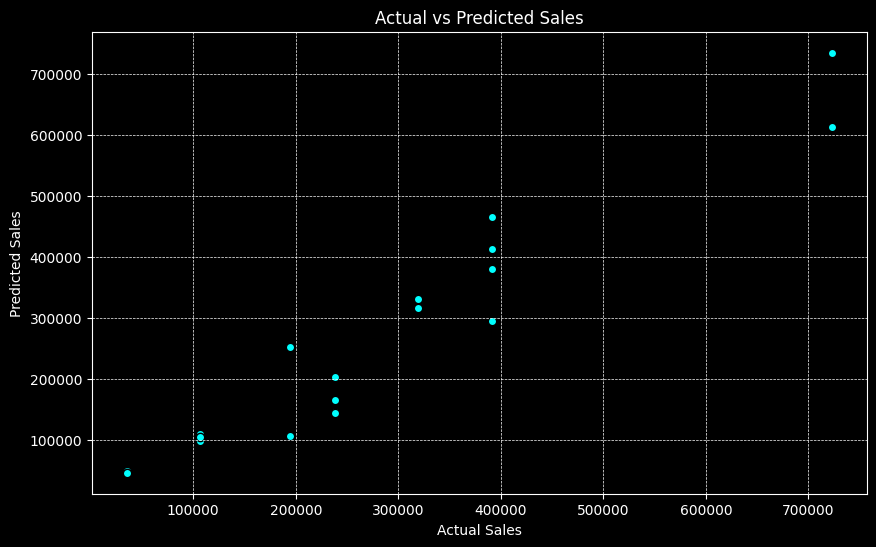

                    Coefficient       P-Value
CO2_Emissions      9.435176e-04  1.476625e-01
Tesla_Open         9.490543e-02  9.138511e-16
Tesla_Volume       2.011325e-09  1.610153e-02
Coal               2.772351e+00  2.509018e-07
Distillate         8.392164e-02  1.213629e-06
Propane           -1.009660e-01  1.346673e-07
Electricity       -1.631402e-01  9.225718e-06
Electricity_Price -1.888305e+01  6.092367e-02


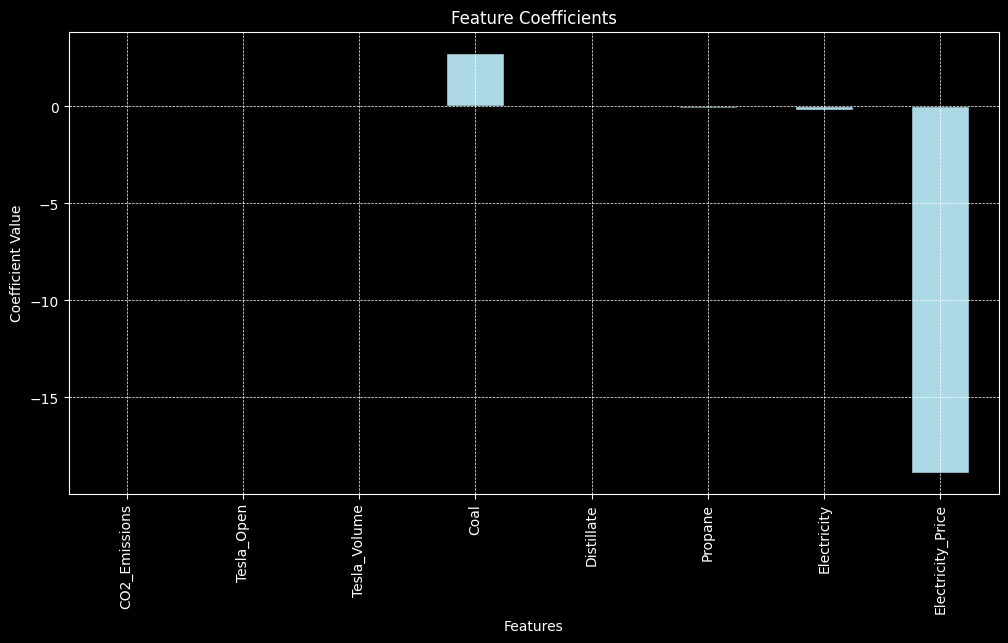

Significant features based on p-value < 0.05:
Index(['Tesla_Open', 'Tesla_Volume', 'Coal', 'Distillate', 'Propane',
       'Electricity'],
      dtype='object')


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the combined dataset
combined_data = pd.read_csv('./dataset/combined_data_monthly.csv')

# Ensure all columns are numeric where possible (excluding the 'Year' column)
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Drop columns with missing values
combined_data_dropped = combined_data.dropna(axis=1)

# Define the feature columns and target column
X = combined_data_dropped.drop(columns=['Sales'])
y = combined_data_dropped['Sales']

# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
X_reduced = X.drop(columns=high_corr_features)

# Calculate VIF for each feature in the reduced set
vif_data = pd.DataFrame()
vif_data['Feature'] = X_reduced.columns
vif_data['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print("Variance Inflation Factors after dropping high correlation features:")
print(vif_data)

# Add a constant to the model (intercept)
X_reduced = sm.add_constant(X_reduced)

# Transform the dependent variable to address heteroscedasticity (e.g., log transformation)
y = np.log(y + 1)  # Add 1 to avoid log(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Create and train the OLS model
ols_model = sm.OLS(y_train, X_train).fit()

# Make predictions
y_pred = ols_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1)  # Convert back to original scale
r2 = r2_score(np.exp(y_test) - 1, np.exp(y_pred) - 1)  # Convert back to original scale

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print the summary of the OLS model
print(ols_model.summary())

# Perform the Durbin-Watson test for serial correlation
dw_test = durbin_watson(ols_model.resid)
print(f"Durbin-Watson Test: {dw_test}")

# Perform the Breusch-Pagan test for heteroscedasticity
if X_reduced.shape[1] > 1:
    bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
    labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    print(dict(zip(labels, bp_test)))
else:
    print("Not enough features to perform Breusch-Pagan test")

# Set dark mode for plots
plt.style.use('dark_background')

# Plot the actual vs predicted sales (back-transformed)
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test) - 1, np.exp(y_pred) - 1, color='cyan', edgecolor='k')
plt.xlabel('Actual Sales', color='white')
plt.ylabel('Predicted Sales', color='white')
plt.title('Actual vs Predicted Sales', color='white')
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the plot
plt.savefig('./dataset/images/image1.png', bbox_inches='tight')
plt.show()

# Get the coefficients and p-values of the model
coefficients = pd.DataFrame({'Coefficient': ols_model.params, 'P-Value': ols_model.pvalues})
print(coefficients)

# Plot the coefficients
plt.figure(figsize=(12, 6))
coefficients['Coefficient'].plot(kind='bar', color='lightblue', edgecolor='k')
plt.title('Feature Coefficients', color='white')
plt.xlabel('Features', color='white')
plt.ylabel('Coefficient Value', color='white')
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the plot
plt.savefig('./dataset/images/image2.png', bbox_inches='tight')
plt.show()

# Highlight significant features
significant_features = coefficients[coefficients['P-Value'] < 0.05].index
print("Significant features based on p-value < 0.05:")
print(significant_features)


Durbin-Watson Statistic: 0.7543680594132787
Breusch-Godfrey Test: (41.0306706718715, 1.4985894979897204e-10, 60.113548535959765, 2.148129115481081e-11)


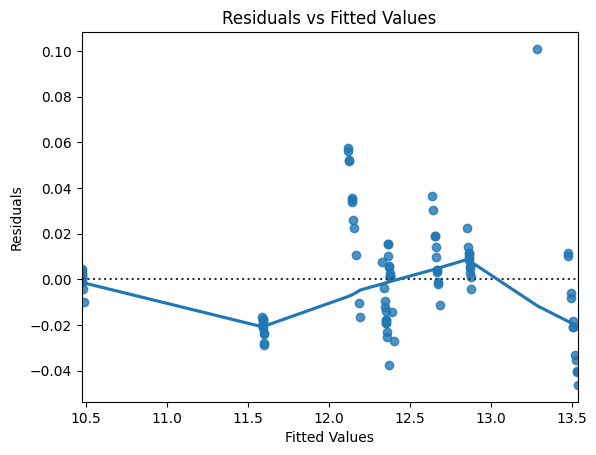

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(ols_model_with_const.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(ols_model_with_const, nlags=1)
print(f'Breusch-Godfrey Test: {bg_test}')

import matplotlib.pyplot as plt
import seaborn as sns

sns.residplot(x=ols_model_with_const.fittedvalues, y=ols_model_with_const.resid, lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
